In [1]:
# Import data from Excel sheet
import pandas as pd
df = pd.read_excel('mwp1_CAT12_DELCODE/Antrag 137_Teipel_Regional Connectivity_20190429_Amendment_MDedit.xlsx', sheet_name='Baseline', header=1)
#print(df)
sid = df['Respeudonym']
grp = df['prmdiag']
age = df['age']
sex = df['sex_bin_1male']
tiv = df['TIV_CAT12']
field = df['FieldStrength']
grpbin = (grp > 0) # 0=CN, ...
amy_bin = df['ratio_Abeta42_40_pos']

In [2]:
# Scan for nifti file names
import glob
dataDELCODE_CN = sorted(glob.glob('mwp1_CAT12_DELCODE/0_CN/*.nii.gz'))
dataDELCODE_MCI = sorted(glob.glob('mwp1_CAT12_DELCODE/2_MCI/*.nii.gz'))
dataDELCODE_AD = sorted(glob.glob('mwp1_CAT12_DELCODE/5_AD/*.nii.gz'))
dataFiles = dataDELCODE_CN + dataDELCODE_MCI + dataDELCODE_AD
numfiles = len(dataFiles)
print('Found ', str(numfiles), ' nifti files')

Found  474  nifti files


In [3]:
# Match covariate information
import re
debug = False
cov_idx = [-1] * numfiles # list; array: np.full((numfiles, 1), -1, dtype=int)
print('Matching covariates for loaded files ...')
for i,id in enumerate(sid):
  p = [j for j,x in enumerate(dataFiles) if re.search('_%s' % id, x)] # extract ID numbers from filename, translate to Excel row index
  if len(p)==0:
    if debug: print('Did not find %04d' % id) # did not find Excel sheet subject ID in loaded file selection
  else:
    if debug: print('Found %04d in %s: %s' % (id, p[0], dataFiles[p[0]]))
    cov_idx[p[0]] = i # store Excel index i for data file index p[0]
print('Checking for scans not found in Excel sheet: ', sum(x<0 for x in cov_idx))

labels = pd.DataFrame({'Group':grpbin}).iloc[cov_idx, :]
grps = pd.DataFrame({'Group':grp, 'RID':sid}).iloc[cov_idx, :]
amy_status = pd.DataFrame({'amy_pos':amy_bin}).iloc[cov_idx, :]

Matching covariates for loaded files ...
Checking for scans not found in Excel sheet:  0


In [4]:
# Load residualized data from disk
import h5py
import numpy as np
from pandas import DataFrame
from keras.utils import to_categorical
hf = h5py.File('orig_images_wb_mwp1_MNI_DELCODE.hdf5', 'r')
hf.keys # read keys
#labels = np.array(hf.get('labels')) # note: was of data frame type before
images = np.array(hf.get('images'))
hf.close()
labels = to_categorical(np.asarray(labels)) # use grps to access original labels
print(images.shape)

Using TensorFlow backend.


(474, 100, 100, 120, 1)


In [5]:
# filter scans by amyloid status
amy_filter = np.equal(np.transpose(amy_status.to_numpy()), labels[:,1])

# drop participants/entries by amy_filter
#dataFiles = [i for (i, v) in zip(dataFiles, np.squeeze(amy_filter)) if v] # filter list of files
#cov_idx = [i for (i, v) in zip(cov_idx, np.squeeze(amy_filter)) if v] # filter list of excel row indices
#labels = labels[np.squeeze(amy_filter), :]
#grps = grps.iloc[np.squeeze(amy_filter)]
#numfiles = len(dataFiles)
#print('Kept ', str(numfiles), ' nifti files')

In [6]:
# disable tensorflow deprecation warnings
import logging
logging.getLogger('tensorflow').disabled=True

In [7]:
# specify version of tensorflow
#%tensorflow_version 1.x
#%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
# downgrade to specific version
#!pip install tensorflow-gpu==1.15
#import tensorflow as tf
#print(tf.__version__)

#from keras.backend.tensorflow_backend import set_session
#config = tf.ConfigProto(
#    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.7)
#    # device_count = {'GPU': 1}
#)
#config.gpu_options.allow_growth = False #True
#session = tf.Session(config=config)
#set_session(session)

1.15.0


validating model newmodel_rawdata_pretrained/newmodel_wb_cv1.hdf5
Test accuracy: 78.66 %


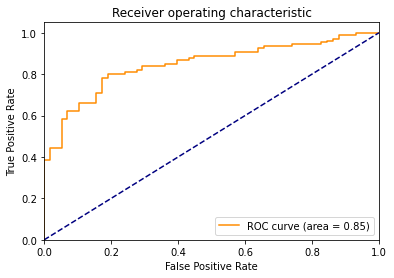

Optimal prediction threshold: 0.78748
Optimal prediction threshold: 0.99670
AUC for MCI vs. CN = 0.77
AUC for AD vs. CN = 0.94
AUC for MCI vs. CN = 0.770
AUC for AD vs. CN = 0.936
Acc for MCI vs. CN = 73.0
Acc for AD vs. CN = 80.4
confusion matrix (naive)
[[41 17]
 [ 0  0]
 [14 43]
 [ 4 45]]
oAcc for MCI vs. CN = 75.7
oAcc for AD vs. CN = 88.8
confusion matrix (optimized)
[[47 11]
 [ 0  0]
 [17 40]
 [ 5 44]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv2.hdf5
Test accuracy: 75.61 %


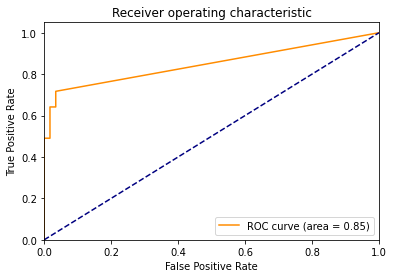

Optimal prediction threshold: 0.34234
Optimal prediction threshold: 0.41740
AUC for MCI vs. CN = 0.76
AUC for AD vs. CN = 0.95
AUC for MCI vs. CN = 0.758
AUC for AD vs. CN = 0.954
Acc for MCI vs. CN = 70.4
Acc for AD vs. CN = 92.5
confusion matrix (naive)
[[56  2]
 [ 0  0]
 [32 25]
 [ 6 43]]
oAcc for MCI vs. CN = 74.8
oAcc for AD vs. CN = 93.5
confusion matrix (optimized)
[[56  2]
 [ 0  0]
 [27 30]
 [ 4 45]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv3.hdf5
Test accuracy: 79.88 %


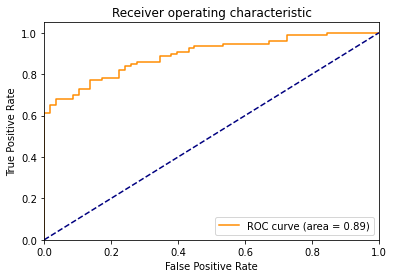

Optimal prediction threshold: 0.99939
Optimal prediction threshold: 0.99977
AUC for MCI vs. CN = 0.83
AUC for AD vs. CN = 0.97
AUC for MCI vs. CN = 0.829
AUC for AD vs. CN = 0.965
Acc for MCI vs. CN = 73.0
Acc for AD vs. CN = 79.4
confusion matrix (naive)
[[38 20]
 [ 0  0]
 [11 46]
 [ 2 47]]
oAcc for MCI vs. CN = 74.8
oAcc for AD vs. CN = 90.7
confusion matrix (optimized)
[[56  2]
 [ 0  0]
 [27 30]
 [ 8 41]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv4.hdf5
Test accuracy: 82.32 %


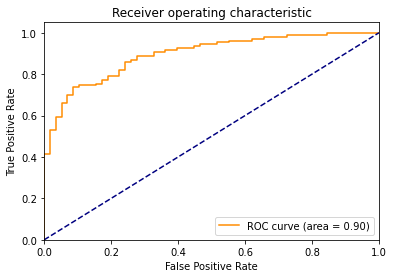

Optimal prediction threshold: 0.50441
Optimal prediction threshold: 0.98165
AUC for MCI vs. CN = 0.85
AUC for AD vs. CN = 0.94
AUC for MCI vs. CN = 0.853
AUC for AD vs. CN = 0.945
Acc for MCI vs. CN = 77.4
Acc for AD vs. CN = 82.2
confusion matrix (naive)
[[42 16]
 [ 0  0]
 [10 47]
 [ 3 46]]
oAcc for MCI vs. CN = 76.5
oAcc for AD vs. CN = 89.7
confusion matrix (optimized)
[[42 16]
 [ 0  0]
 [11 46]
 [ 3 46]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv5.hdf5
Test accuracy: 79.88 %


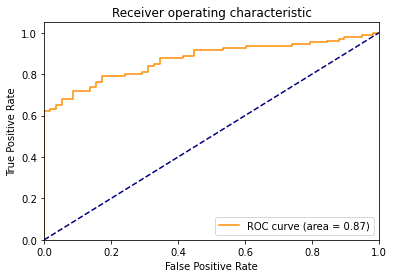

Optimal prediction threshold: 0.45806
Optimal prediction threshold: 0.99139
AUC for MCI vs. CN = 0.84
AUC for AD vs. CN = 0.91
AUC for MCI vs. CN = 0.841
AUC for AD vs. CN = 0.907
Acc for MCI vs. CN = 76.5
Acc for AD vs. CN = 85.0
confusion matrix (naive)
[[48 10]
 [ 0  0]
 [17 40]
 [ 6 43]]
oAcc for MCI vs. CN = 76.5
oAcc for AD vs. CN = 89.7
confusion matrix (optimized)
[[48 10]
 [ 0  0]
 [17 40]
 [ 6 43]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv6.hdf5
Test accuracy: 82.93 %


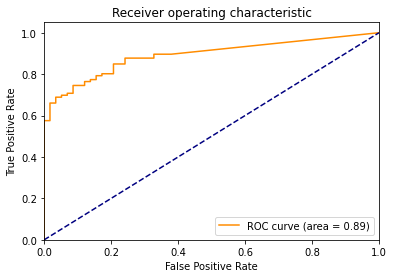

Optimal prediction threshold: 0.67351
Optimal prediction threshold: 0.99117
AUC for MCI vs. CN = 0.84
AUC for AD vs. CN = 0.95
AUC for MCI vs. CN = 0.838
AUC for AD vs. CN = 0.952
Acc for MCI vs. CN = 78.3
Acc for AD vs. CN = 84.1
confusion matrix (naive)
[[44 14]
 [ 0  0]
 [11 46]
 [ 3 46]]
oAcc for MCI vs. CN = 79.1
oAcc for AD vs. CN = 89.7
confusion matrix (optimized)
[[46 12]
 [ 0  0]
 [12 45]
 [ 5 44]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv7.hdf5
Test accuracy: 75.00 %


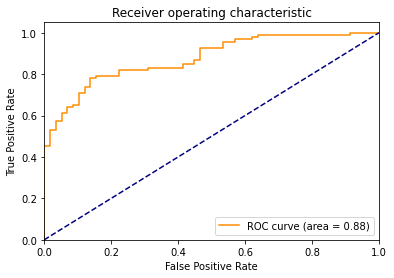

Optimal prediction threshold: 0.97739
Optimal prediction threshold: 0.99845
AUC for MCI vs. CN = 0.82
AUC for AD vs. CN = 0.94
AUC for MCI vs. CN = 0.820
AUC for AD vs. CN = 0.943
Acc for MCI vs. CN = 67.0
Acc for AD vs. CN = 74.8
confusion matrix (naive)
[[34 24]
 [ 0  0]
 [14 43]
 [ 3 46]]
oAcc for MCI vs. CN = 74.8
oAcc for AD vs. CN = 89.7
confusion matrix (optimized)
[[49  9]
 [ 0  0]
 [20 37]
 [ 3 46]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv8.hdf5
Test accuracy: 75.00 %


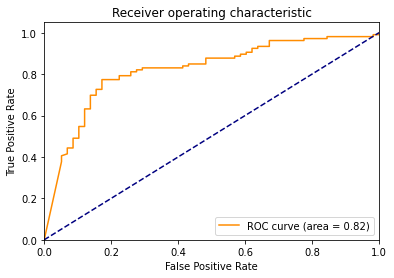

Optimal prediction threshold: 0.99146
Optimal prediction threshold: 0.99926
AUC for MCI vs. CN = 0.74
AUC for AD vs. CN = 0.91
AUC for MCI vs. CN = 0.743
AUC for AD vs. CN = 0.912
Acc for MCI vs. CN = 65.2
Acc for AD vs. CN = 72.9
confusion matrix (naive)
[[30 28]
 [ 0  0]
 [12 45]
 [ 1 48]]
oAcc for MCI vs. CN = 73.0
oAcc for AD vs. CN = 86.9
confusion matrix (optimized)
[[48 10]
 [ 0  0]
 [21 36]
 [ 5 44]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv9.hdf5
Test accuracy: 78.05 %


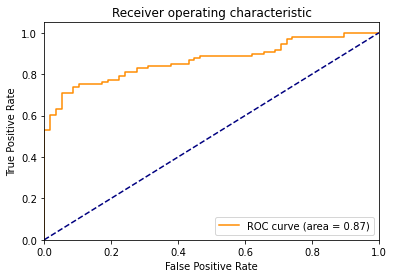

Optimal prediction threshold: 0.86225
Optimal prediction threshold: 0.91375
AUC for MCI vs. CN = 0.81
AUC for AD vs. CN = 0.94
AUC for MCI vs. CN = 0.806
AUC for AD vs. CN = 0.935
Acc for MCI vs. CN = 73.0
Acc for AD vs. CN = 77.6
confusion matrix (naive)
[[39 19]
 [ 0  0]
 [12 45]
 [ 5 44]]
oAcc for MCI vs. CN = 75.7
oAcc for AD vs. CN = 91.6
confusion matrix (optimized)
[[52  6]
 [ 0  0]
 [22 35]
 [ 5 44]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv10.hdf5
Test accuracy: 79.88 %


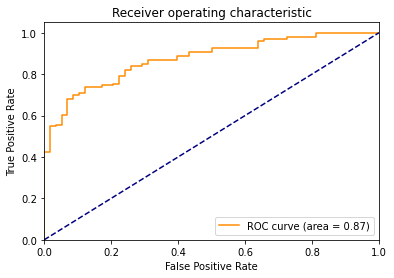

Optimal prediction threshold: 0.36763
Optimal prediction threshold: 0.97662
AUC for MCI vs. CN = 0.80
AUC for AD vs. CN = 0.95
AUC for MCI vs. CN = 0.805
AUC for AD vs. CN = 0.955
Acc for MCI vs. CN = 73.0
Acc for AD vs. CN = 82.2
confusion matrix (naive)
[[41 17]
 [ 0  0]
 [14 43]
 [ 2 47]]
oAcc for MCI vs. CN = 73.0
oAcc for AD vs. CN = 91.6
confusion matrix (optimized)
[[40 18]
 [ 0  0]
 [13 44]
 [ 2 47]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv11.hdf5
Test accuracy: 79.27 %


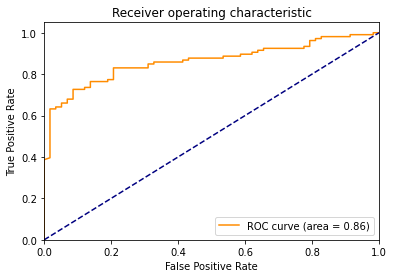

Optimal prediction threshold: 0.85264
Optimal prediction threshold: 0.99320
AUC for MCI vs. CN = 0.78
AUC for AD vs. CN = 0.96
AUC for MCI vs. CN = 0.779
AUC for AD vs. CN = 0.958
Acc for MCI vs. CN = 72.2
Acc for AD vs. CN = 80.4
confusion matrix (naive)
[[39 19]
 [ 0  0]
 [13 44]
 [ 2 47]]
oAcc for MCI vs. CN = 74.8
oAcc for AD vs. CN = 90.7
confusion matrix (optimized)
[[46 12]
 [ 0  0]
 [17 40]
 [ 2 47]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv12.hdf5
Test accuracy: 84.76 %


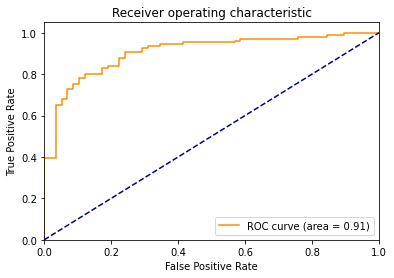

Optimal prediction threshold: 0.62696
Optimal prediction threshold: 0.99320
AUC for MCI vs. CN = 0.85
AUC for AD vs. CN = 0.97
AUC for MCI vs. CN = 0.852
AUC for AD vs. CN = 0.970
Acc for MCI vs. CN = 79.1
Acc for AD vs. CN = 85.0
confusion matrix (naive)
[[43 15]
 [ 0  0]
 [ 9 48]
 [ 1 48]]
oAcc for MCI vs. CN = 79.1
oAcc for AD vs. CN = 93.5
confusion matrix (optimized)
[[44 14]
 [ 0  0]
 [10 47]
 [ 1 48]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv13.hdf5
Test accuracy: 79.88 %


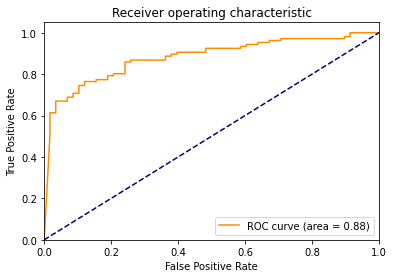

Optimal prediction threshold: 0.94427
Optimal prediction threshold: 0.99962
AUC for MCI vs. CN = 0.81
AUC for AD vs. CN = 0.96
AUC for MCI vs. CN = 0.812
AUC for AD vs. CN = 0.960
Acc for MCI vs. CN = 73.0
Acc for AD vs. CN = 78.5
confusion matrix (naive)
[[37 21]
 [ 0  0]
 [10 47]
 [ 2 47]]
oAcc for MCI vs. CN = 75.7
oAcc for AD vs. CN = 91.6
confusion matrix (optimized)
[[43 15]
 [ 0  0]
 [13 44]
 [ 2 47]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv14.hdf5
Test accuracy: 81.10 %


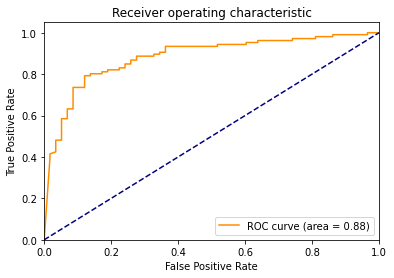

Optimal prediction threshold: 0.97916
Optimal prediction threshold: 0.98312
AUC for MCI vs. CN = 0.83
AUC for AD vs. CN = 0.95
AUC for MCI vs. CN = 0.825
AUC for AD vs. CN = 0.950
Acc for MCI vs. CN = 73.9
Acc for AD vs. CN = 81.3
confusion matrix (naive)
[[39 19]
 [ 0  0]
 [11 46]
 [ 1 48]]
oAcc for MCI vs. CN = 76.5
oAcc for AD vs. CN = 89.7
confusion matrix (optimized)
[[50  8]
 [ 0  0]
 [19 38]
 [ 3 46]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv15.hdf5
Test accuracy: 80.49 %


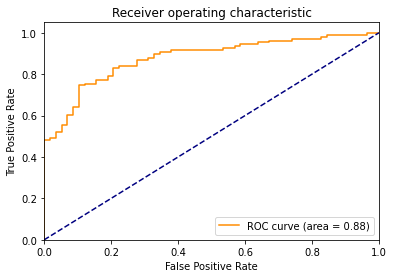

Optimal prediction threshold: 0.99681
Optimal prediction threshold: 0.99429
AUC for MCI vs. CN = 0.84
AUC for AD vs. CN = 0.92
AUC for MCI vs. CN = 0.841
AUC for AD vs. CN = 0.921
Acc for MCI vs. CN = 73.9
Acc for AD vs. CN = 76.6
confusion matrix (naive)
[[35 23]
 [ 0  0]
 [ 7 50]
 [ 2 47]]
oAcc for MCI vs. CN = 79.1
oAcc for AD vs. CN = 84.1
confusion matrix (optimized)
[[52  6]
 [ 0  0]
 [18 39]
 [10 39]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv16.hdf5
Test accuracy: 75.61 %


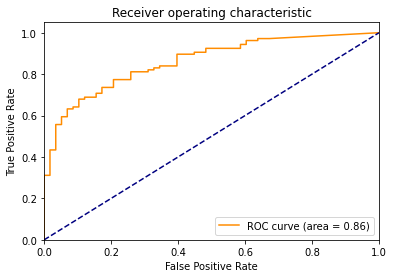

Optimal prediction threshold: 0.99073
Optimal prediction threshold: 0.99987
AUC for MCI vs. CN = 0.80
AUC for AD vs. CN = 0.93
AUC for MCI vs. CN = 0.803
AUC for AD vs. CN = 0.928
Acc for MCI vs. CN = 66.1
Acc for AD vs. CN = 66.4
confusion matrix (naive)
[[23 35]
 [ 0  0]
 [ 4 53]
 [ 1 48]]
oAcc for MCI vs. CN = 73.9
oAcc for AD vs. CN = 87.9
confusion matrix (optimized)
[[46 12]
 [ 0  0]
 [18 39]
 [ 7 42]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv17.hdf5
Test accuracy: 79.88 %


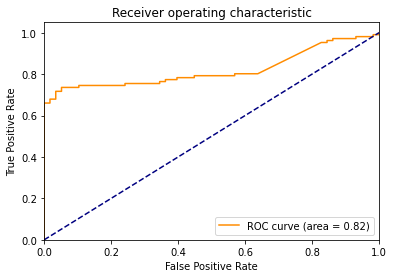

Optimal prediction threshold: 0.48351
Optimal prediction threshold: 0.63288
AUC for MCI vs. CN = 0.70
AUC for AD vs. CN = 0.95
AUC for MCI vs. CN = 0.704
AUC for AD vs. CN = 0.955
Acc for MCI vs. CN = 73.9
Acc for AD vs. CN = 94.4
confusion matrix (naive)
[[55  3]
 [ 0  0]
 [27 30]
 [ 3 46]]
oAcc for MCI vs. CN = 74.8
oAcc for AD vs. CN = 95.3
confusion matrix (optimized)
[[55  3]
 [ 0  0]
 [26 31]
 [ 3 46]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv18.hdf5
Test accuracy: 78.05 %


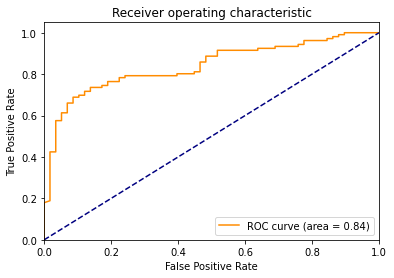

Optimal prediction threshold: 0.85525
Optimal prediction threshold: 0.73035
AUC for MCI vs. CN = 0.76
AUC for AD vs. CN = 0.94
AUC for MCI vs. CN = 0.755
AUC for AD vs. CN = 0.939
Acc for MCI vs. CN = 71.3
Acc for AD vs. CN = 84.1
confusion matrix (naive)
[[44 14]
 [ 0  0]
 [19 38]
 [ 3 46]]
oAcc for MCI vs. CN = 73.0
oAcc for AD vs. CN = 86.9
confusion matrix (optimized)
[[51  7]
 [ 0  0]
 [24 33]
 [ 7 42]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv19.hdf5
Test accuracy: 81.71 %


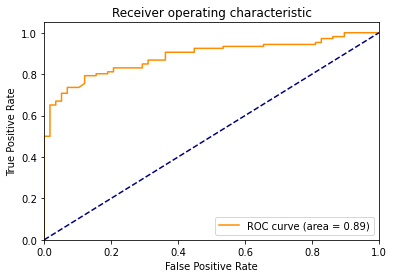

Optimal prediction threshold: 0.51639
Optimal prediction threshold: 0.75484
AUC for MCI vs. CN = 0.83
AUC for AD vs. CN = 0.95
AUC for MCI vs. CN = 0.830
AUC for AD vs. CN = 0.951
Acc for MCI vs. CN = 77.4
Acc for AD vs. CN = 88.8
confusion matrix (naive)
[[50  8]
 [ 0  0]
 [18 39]
 [ 4 45]]
oAcc for MCI vs. CN = 77.4
oAcc for AD vs. CN = 90.7
confusion matrix (optimized)
[[51  7]
 [ 0  0]
 [19 38]
 [ 4 45]]
validating model newmodel_rawdata_pretrained/newmodel_wb_cv20.hdf5
Test accuracy: 81.10 %


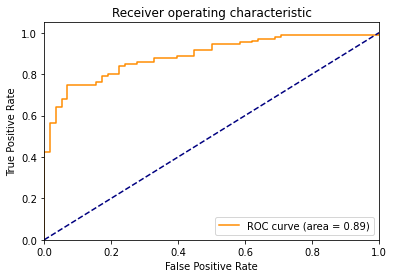

Optimal prediction threshold: 0.98745
Optimal prediction threshold: 0.99287
AUC for MCI vs. CN = 0.84
AUC for AD vs. CN = 0.94
AUC for MCI vs. CN = 0.841
AUC for AD vs. CN = 0.944
Acc for MCI vs. CN = 75.7
Acc for AD vs. CN = 82.2
confusion matrix (naive)
[[42 16]
 [ 0  0]
 [12 45]
 [ 3 46]]
oAcc for MCI vs. CN = 78.3
oAcc for AD vs. CN = 88.8
confusion matrix (optimized)
[[54  4]
 [ 0  0]
 [21 36]
 [ 7 42]]


In [8]:
# Split data into training/validation and holdout test data
from sklearn.model_selection import StratifiedKFold,train_test_split
import numpy as np
import gc
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0" # model will be trained on GPU 0

import keras
from keras import layers
from keras.layers.normalization import BatchNormalization
from keras import models
from keras.optimizers import Adam
from keras import initializers
from keras.callbacks import EarlyStopping
import tensorflow as tf
from statistics import mean,stdev
from sklearn.metrics import confusion_matrix

acc_test, auc_test, auc_AD, auc_MCI = [], [], [], []
acc_AD, acc_MCI, opt_acc_AD, opt_acc_MCI = [], [], [], []
grps['pred'] = np.nan #-1

num_kfold = 20 # number of cross-validation loops equal to number of models
batch_size = 8

for k in range(num_kfold):
    gc.collect()
    print('validating model newmodel_rawdata_pretrained/newmodel_wb_cv%d.hdf5' % (k+1))
    mymodel = models.load_model('newmodel_rawdata_pretrained/newmodel_wb_cv%d.hdf5' % (k+1))
    
    # Calculate accuracy for validation data
    #scores = mymodel.evaluate(images, labels, batch_size=batch_size) #, verbose=0
    #print("Test %s: %.2f%%" % (mymodel.metrics_names[1], scores[1]*100))
    #acc_test.append(scores[1]*100)
    test_idX = np.array(range(amy_filter.shape[1]))[np.squeeze(amy_filter)] # filter index vector by amy status
    testgrps = grps.iloc[test_idX, :]
    testdat = images[test_idX, :]
    test_Y = labels[test_idX, :]
    
    # calculate area under the curve
    # AUC as optimization function during training: https://stackoverflow.com/questions/41032551/how-to-compute-receiving-operating-characteristic-roc-and-auc-in-keras
    pred = mymodel.predict(testdat, batch_size=batch_size)
    grps.iloc[test_idX, 2] = pred[:, 1]
    acc_all = np.mean((test_Y[:, 1] == np.round(pred[:, 1])).astype(int))*100
    print("Test accuracy: %.2f %%" % acc_all)
    acc_test.append(acc_all)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    acc = dict()
    opt_acc = dict()
    thresh = dict()
    for i in range(2): # classes dummy vector: 0 - CN, 1 - MCI/AD
        fpr[i], tpr[i], _ = roc_curve(test_Y[:, i], pred[:,i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    #Plot of a ROC curve for a specific class
    plt.figure()
    plt.plot(fpr[1], tpr[1], color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    auc_test.append(roc_auc[1])
    
    # redo AUC for binary comparison: AD vs. HC and MCI vs. HC
    for i in [2,5]:
      grpi = np.equal(testgrps.Group.to_numpy(dtype=np.int), np.ones((testgrps.shape[0],), dtype=np.int)*i)
      grp1 = np.equal(testgrps.Group.to_numpy(dtype=np.int), np.zeros((testgrps.shape[0],), dtype=np.int))
      grpidx = np.logical_or(grpi, grp1)
      fpr[i], tpr[i], thresholds = roc_curve(test_Y[grpidx, 1], pred[grpidx, 1])
      roc_auc[i] = auc(fpr[i], tpr[i])
      thresh[i] = thresholds[np.argmax(tpr[i] - fpr[i])]
      print('Optimal prediction threshold: %0.5f' % thresh[i])
      acc[i] = np.mean((test_Y[grpidx, 1] == np.round(pred[grpidx, 1])).astype(int))*100
      opt_acc[i] = np.mean((test_Y[grpidx, 1] == (pred[grpidx, 1]>thresh[i]).astype(int)).astype(int))*100

    print('AUC for MCI vs. CN = %0.2f' % roc_auc[2])
    print('AUC for AD vs. CN = %0.2f' % roc_auc[5])
    auc_AD.append(roc_auc[5])
    auc_MCI.append(roc_auc[2])
    acc_AD.append(acc[5])
    acc_MCI.append(acc[2])
    opt_acc_AD.append(opt_acc[5])
    opt_acc_MCI.append(opt_acc[2])
    
    print('AUC for MCI vs. CN = %0.3f' % roc_auc[2])
    print('AUC for AD vs. CN = %0.3f' % roc_auc[5])
    print('Acc for MCI vs. CN = %0.1f' % acc[2])
    print('Acc for AD vs. CN = %0.1f' % acc[5])
    print('confusion matrix (naive)')
    confmat = confusion_matrix(testgrps.Group, np.round(pred[:, 1]))
    print(confmat[:,(0,1)])
    print('oAcc for MCI vs. CN = %0.1f' % opt_acc[2])
    print('oAcc for AD vs. CN = %0.1f' % opt_acc[5])
    print('confusion matrix (optimized)')
    confmat = confusion_matrix(testgrps.Group, (pred[:, 1]>thresh[2]).astype(int)) ## use MCI threshold
    print(confmat[:,(0,1)])

In [9]:
# print model performance summary
from statistics import mean,stdev
print('Acc for all test data = %0.1f +/- %0.1f' % (mean(acc_test), stdev(acc_test)))
print('AUC for all test data = %0.3f +/- %0.3f' % (mean(auc_test), stdev(auc_test)))
print('AUC for MCI vs. CN = %0.3f +/- %0.3f' % (mean(auc_MCI), stdev(auc_MCI)))
print('AUC for AD vs. CN = %0.3f +/- %0.3f' % (mean(auc_AD), stdev(auc_AD)))
print('Mean Acc for MCI vs. CN = %0.1f +/- %0.1f' % (mean(acc_MCI), stdev(acc_MCI)))
print('Mean Acc for AD vs. CN = %0.1f +/- %0.1f' % (mean(acc_AD), stdev(acc_AD)))
print('Mean oAcc for MCI vs. CN = %0.1f +/- %0.1f' % (mean(opt_acc_MCI), stdev(opt_acc_MCI)))
print('Mean oAcc for AD vs. CN = %0.1f +/- %0.1f' % (mean(opt_acc_AD), stdev(opt_acc_AD)))

fpr_all, tpr_all, thresholds_all = roc_curve(labels[np.isfinite(grps.pred), 1], grps.pred[np.isfinite(grps.pred)])
thresh_all = thresholds_all[np.argmax(tpr_all - fpr_all)]
print(thresh_all)
roc_auc_all = auc(fpr_all, tpr_all)
acc_all = np.mean((labels[np.isfinite(grps.pred), 1] == np.round(grps.pred[np.isfinite(grps.pred)])).astype(int))*100
opt_acc_all = np.mean((labels[np.isfinite(grps.pred), 1] == (grps.pred[np.isfinite(grps.pred)]>thresh_all).astype(int)).astype(int))*100

confmat = confusion_matrix(grps.Group[np.isfinite(grps.pred)]-1, (grps.pred[np.isfinite(grps.pred)]>thresh_all).astype(int))
print('Naive accuracy: %0.1f %%' % acc_all)
print('confusion matrix (naive)')
print(confusion_matrix(grps.Group[np.isfinite(grps.pred)]-1, np.round(grps.pred[np.isfinite(grps.pred)]))[:,(1,2)])

print('Optimized accuracy: %0.1f %%' % opt_acc_all)
print('confusion matrix (optimized)')
print(confmat[:,(1,2)])

Acc for all test data = 79.5 +/- 2.7
AUC for all test data = 0.869 +/- 0.024
AUC for MCI vs. CN = 0.805 +/- 0.041
AUC for AD vs. CN = 0.944 +/- 0.017
Mean Acc for MCI vs. CN = 73.2 +/- 3.8
Mean Acc for AD vs. CN = 81.4 +/- 6.4
Mean oAcc for MCI vs. CN = 75.8 +/- 2.0
Mean oAcc for AD vs. CN = 90.0 +/- 2.5
0.987450361251831
Naive accuracy: 81.1 %
confusion matrix (naive)
[[42 16]
 [ 0  0]
 [12 45]
 [ 3 46]]
Optimized accuracy: 80.5 %
confusion matrix (optimized)
[[54  4]
 [ 0  0]
 [21 36]
 [ 7 42]]


In [10]:
results = pd.DataFrame({'Accuracy_Test':acc_test, 'AUC_Test':auc_test, 'AUC_MCI':auc_MCI, 'AUC_AD':auc_AD,
                        'Acc_MCI':acc_MCI, 'Acc_AD':acc_AD,
                        'Opt_acc_MCI':opt_acc_MCI, 'Opt_acc_AD':opt_acc_AD})
print(results)

    Accuracy_Test  AUC_Test   AUC_MCI    AUC_AD    Acc_MCI     Acc_AD  \
0       78.658537  0.846454  0.769510  0.935961  73.043478  80.373832   
1       75.609756  0.848406  0.757713  0.953906  70.434783  92.523364   
2       79.878049  0.891997  0.829099  0.965165  73.043478  79.439252   
3       82.317073  0.895250  0.852692  0.944757  77.391304  82.242991   
4       79.878049  0.871178  0.840593  0.906756  76.521739  85.046729   
5       82.926829  0.890696  0.838173  0.951795  78.260870  84.112150   
6       75.000000  0.876871  0.820327  0.942646  66.956522  74.766355   
7       75.000000  0.820999  0.742892  0.911858  65.217391  72.897196   
8       78.048780  0.865810  0.806110  0.935257  73.043478  77.570093   
9       79.878049  0.874105  0.804598  0.954961  73.043478  82.242991   
10      79.268293  0.861988  0.779492  0.957952  72.173913  80.373832   
11      84.756098  0.906799  0.852390  0.970091  79.130435  85.046729   
12      79.878049  0.880449  0.811857  0.960239  73